# sigma, D = 10

In [5]:
library(tidyverse, magrittr)
library(ggdark)
library(future)
library(furrr)
future::plan(multicore)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [31]:
source("../R/alg/cma-es-csa.R")
source("../R/alg/cma-es-expth.R")
source("../R/alg/cma-es-tpat.R")
source("../R/eval-funcs.R")
source("../R/plot-funcs.R")
options(repr.plot.width=15, repr.plot.height=20)

In [15]:
lambda = c(0.001, 0.01, 0.1, 1, 10, 100, 1000)
x0 = rep(100, 10)

In [13]:
run_exp = function(params, alg, func, x0) {
    params %>% furrr::future_map_dfr(function(param) {
        result = 
            alg(x0, fn = function(x) func(x), lower = -100, upper = 100, control = list(sigma = param))
        data.frame(
            counteval = result$counts[["function"]],
            sigma = param
        )
    })
}

In [10]:
plot_lambda = function(df, N) {
    df %>%
    ggplot2::ggplot() +
    ggplot2::geom_line(aes(x = sigma, y = counteval, col = func)) + 
    ggdark::dark_theme_bw() + 
    ggplot2::theme(
        axis.title = ggplot2::element_text(size = 15, face = "bold"),
        axis.text = ggplot2::element_text(size = 15, face = "bold"),
        legend.text = ggplot2::element_text(size = 15, face = "bold"),
        legend.title = ggplot2::element_text(size = 15, face = "bold"),
    ) + 
    ggplot2::scale_y_continuous(limits = c(0, 10000 * N), breaks = seq(0, 10000 * N, 10000))
}                               
plot_lambda_alg = function(df, N) {
    df %>%
    ggplot2::ggplot() +
    ggplot2::geom_line(aes(x = sigma, y = counteval, col = method)) + 
    ggdark::dark_theme_bw() + 
    ggplot2::theme(
        axis.title = ggplot2::element_text(size = 15, face = "bold"),
        axis.text = ggplot2::element_text(size = 15, face = "bold"),
        legend.text = ggplot2::element_text(size = 15, face = "bold"),
        legend.title = ggplot2::element_text(size = 15, face = "bold"),
    ) + 
    ggplot2::scale_y_continuous(limits = c(0, 10000 * N), breaks = seq(0, 10000 * N, 10000)) + 
    ggplot2::facet_wrap( ~ func)
}                               
                                                        

In [11]:
elips10 = . %>% ellips_func(a = 10)
elips100 = . %>% ellips_func(a = 100)

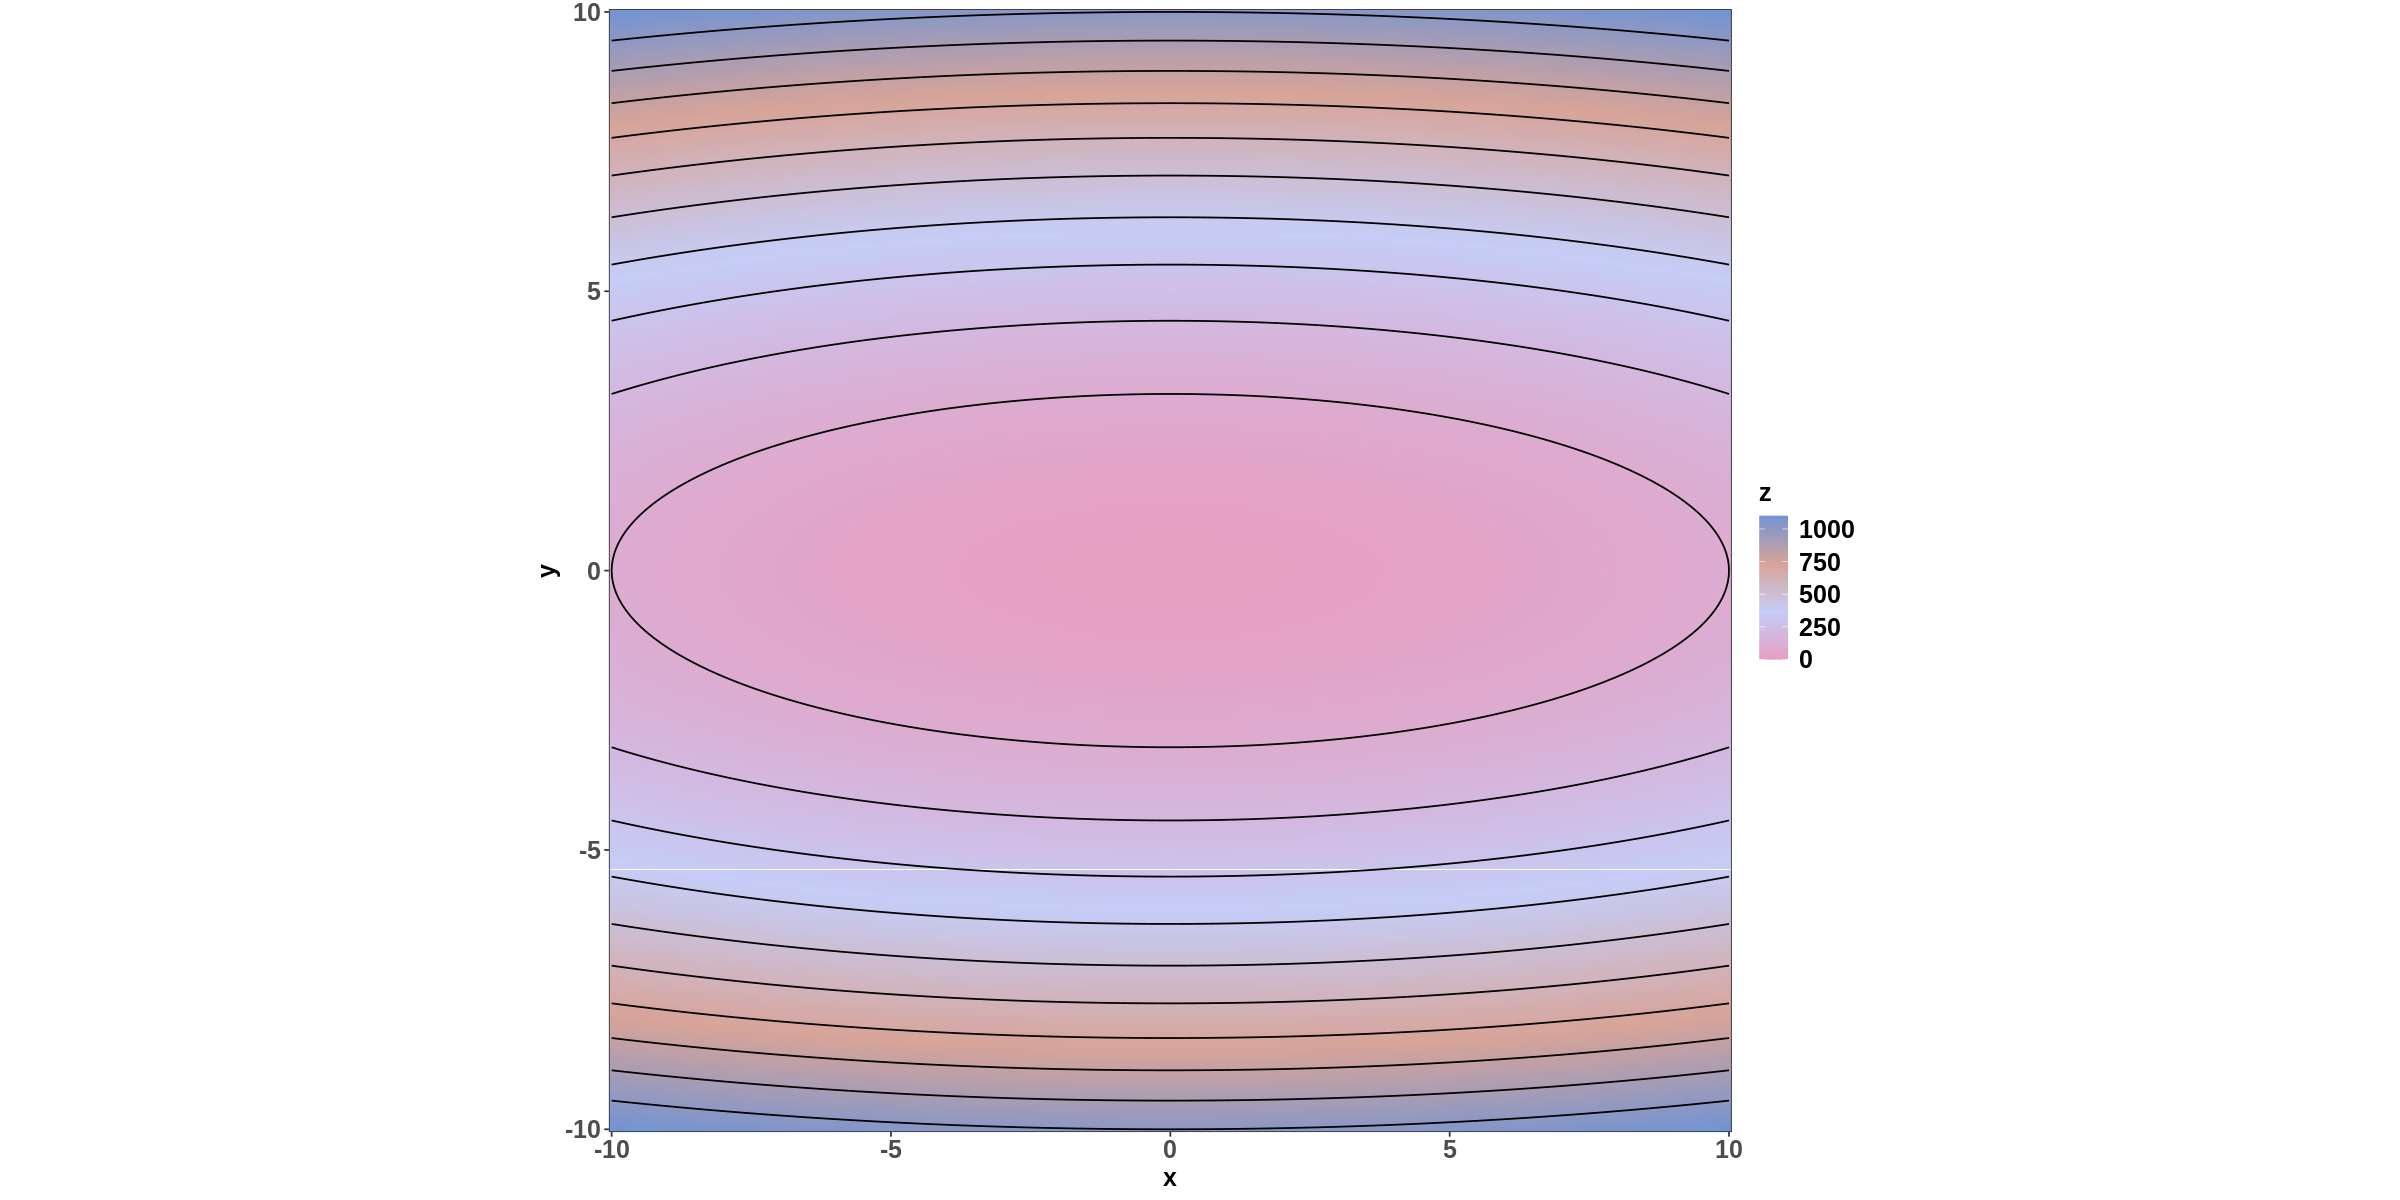

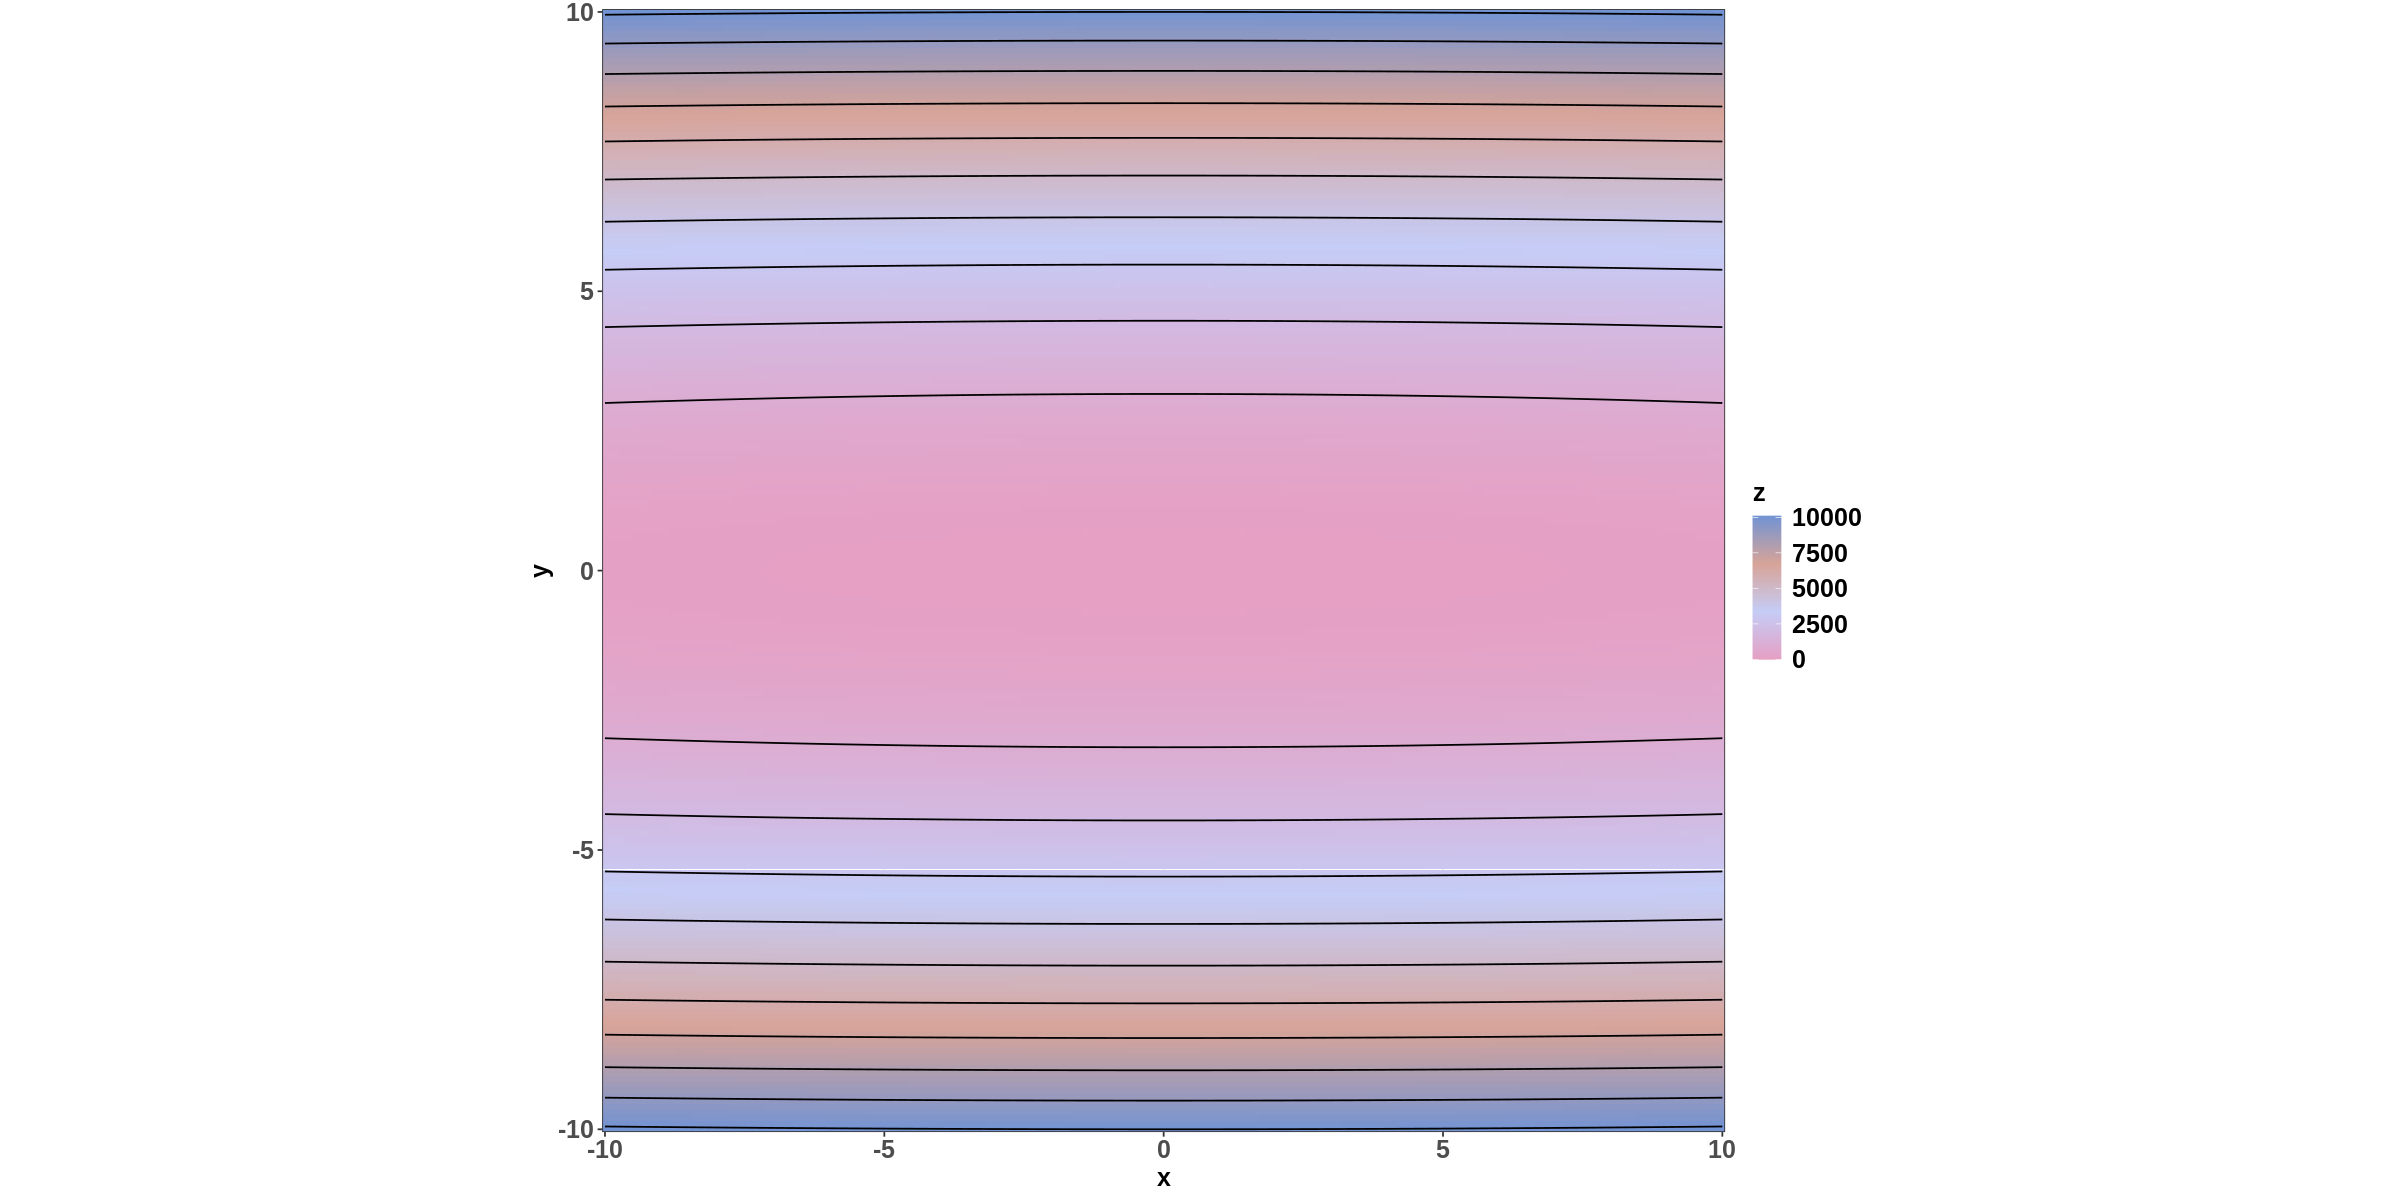

In [44]:
contour_plot(elips10, c(-10, 10), c(-10, 10))

contour_plot(elips100, c(-10, 10), c(-10, 10))

In [16]:
res_sphere = 
    run_exp(lambda, cma_es_ppmf, sphere_func, x0)

Warning message:
“UNRELIABLE VALUE: Future (‘<none>’) unexpectedly generated random numbers without specifying argument '[future.]seed'. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify argument '[future.]seed', e.g. 'seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use [future].seed=NULL, or set option 'future.rng.onMisuse' to "ignore".”
Warning message:
“UNRELIABLE VALUE: Future (‘<none>’) unexpectedly generated random numbers without specifying argument '[future.]seed'. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify argument '[future.]seed', e.g. 'seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use [future].seed=NULL, or set option 'future.rng.onMisu

In [17]:
res_linear = 
    run_exp(lambda, cma_es_ppmf, linear_func, x0)
res_elips10 = 
    run_exp(lambda, cma_es_ppmf, elips10, x0)
res_elips100 = 
    run_exp(lambda, cma_es_ppmf, elips100, x0)

Warning message:
“UNRELIABLE VALUE: Future (‘<none>’) unexpectedly generated random numbers without specifying argument '[future.]seed'. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify argument '[future.]seed', e.g. 'seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use [future].seed=NULL, or set option 'future.rng.onMisuse' to "ignore".”
Warning message:
“UNRELIABLE VALUE: Future (‘<none>’) unexpectedly generated random numbers without specifying argument '[future.]seed'. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify argument '[future.]seed', e.g. 'seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use [future].seed=NULL, or set option 'future.rng.onMisu

In [18]:
res_sphere %<>% dplyr::mutate(func = "sphere")
res_linear %<>% dplyr::mutate(func = "linear")
res_elips10 %<>% dplyr::mutate(func = "elips10")
res_elips100 %<>% dplyr::mutate(func = "elips100")

all_data = 
    dplyr::bind_rows(res_sphere, res_linear, res_elips10, res_elips100)

Inverted geom defaults of fill and color/colour.
To change them back, use invert_geom_defaults().



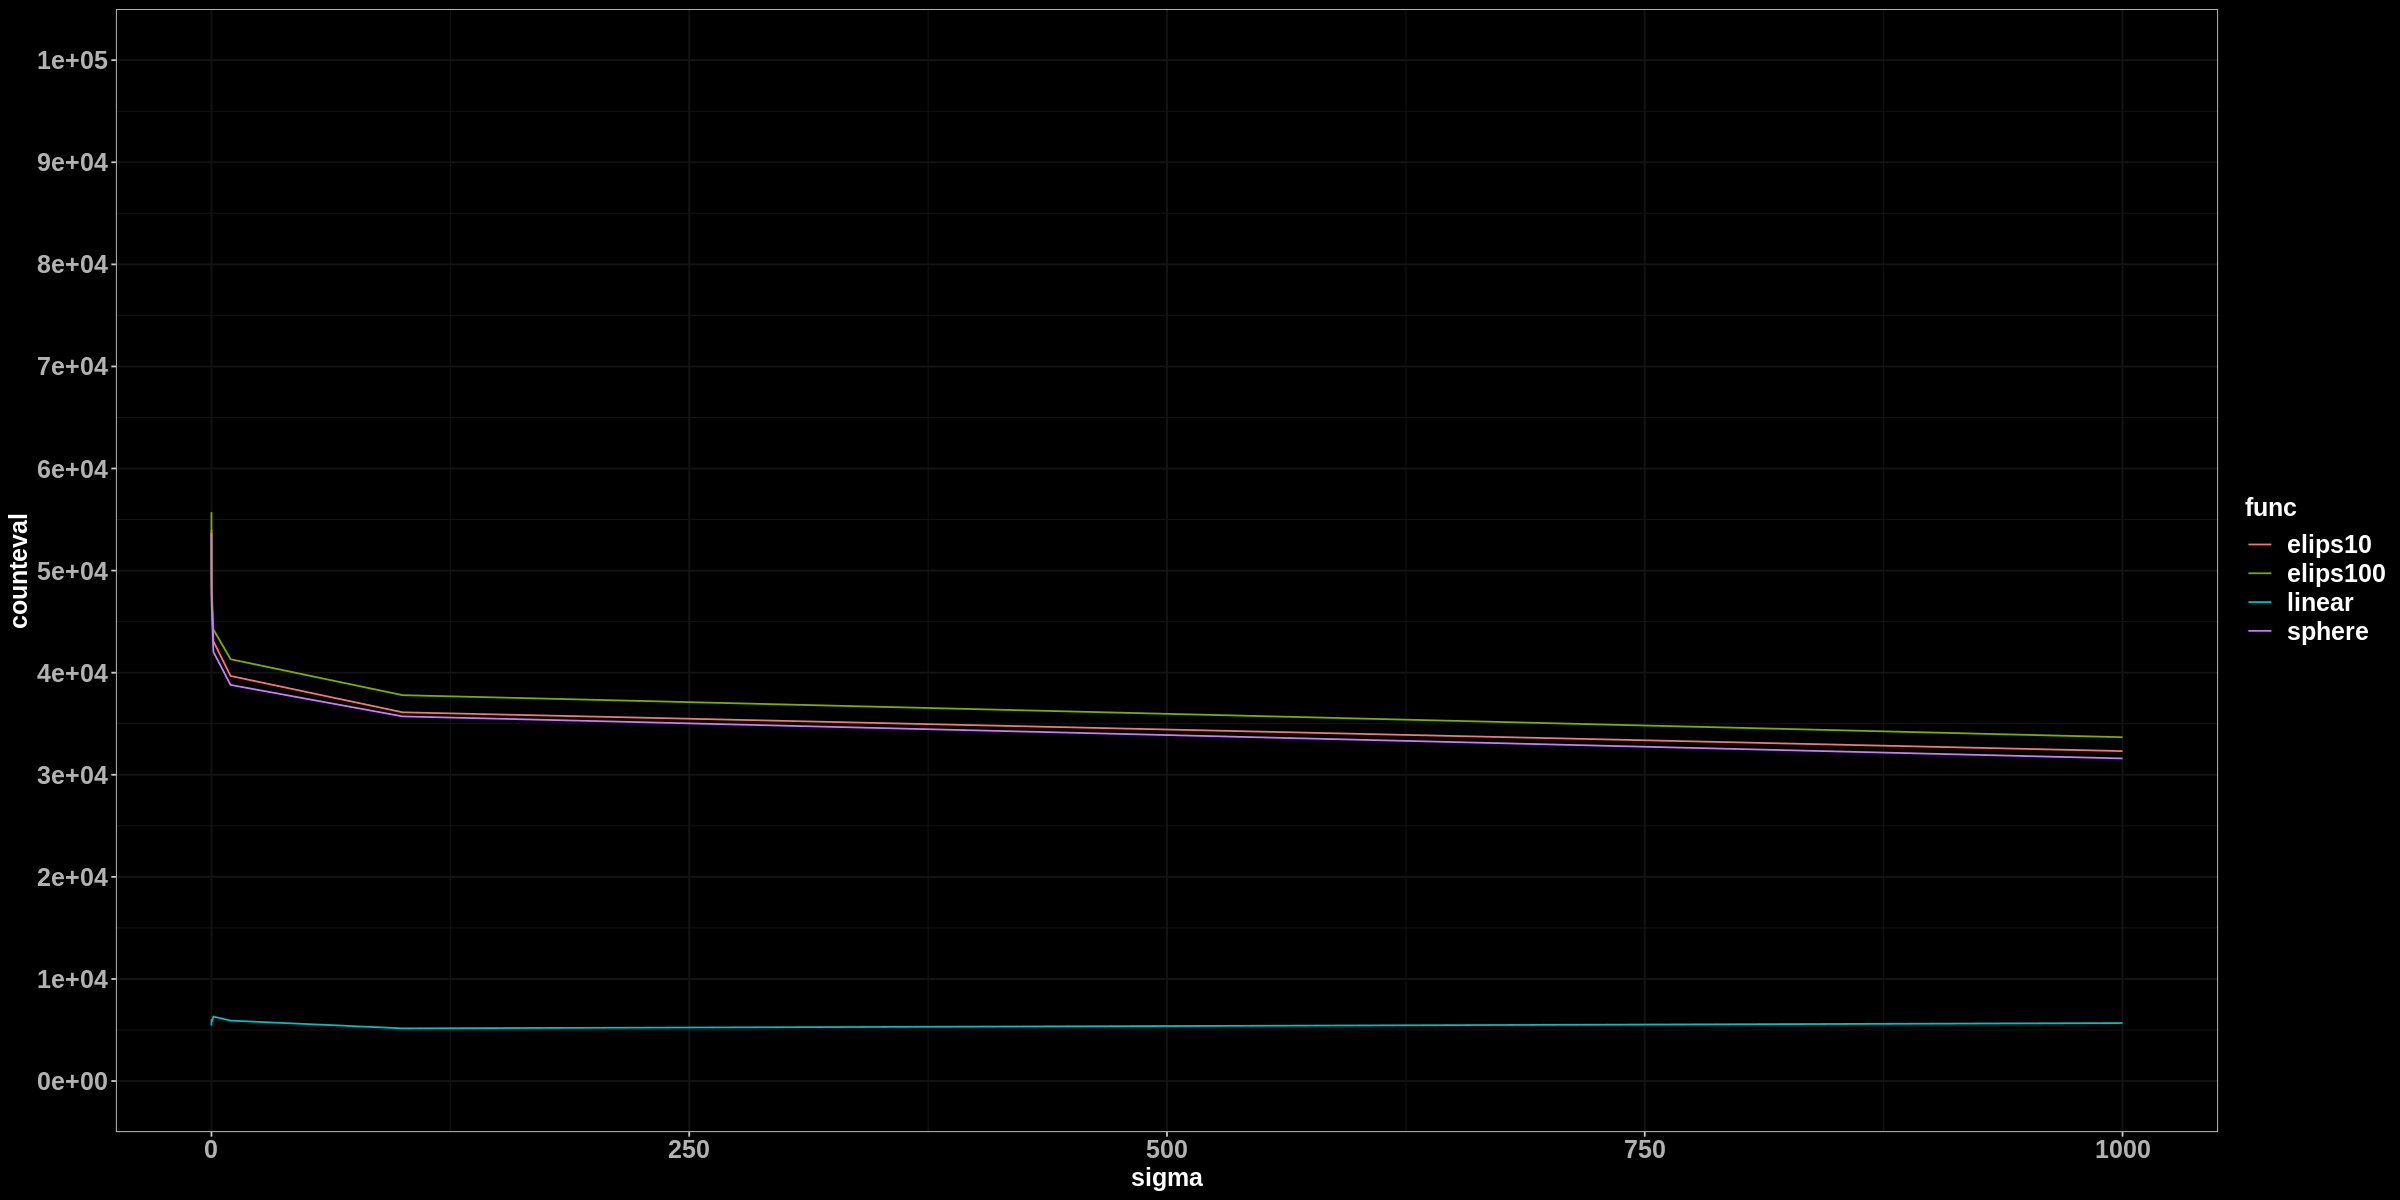

In [19]:
all_data %>% plot_lambda(N = 10)

In [20]:
res_sphere_csa = 
    run_exp(lambda, cma_es_csa, sphere_func, x0)
res_linear_csa = 
    run_exp(lambda, cma_es_csa, linear_func, x0)
res_elips10_csa = 
    run_exp(lambda, cma_es_csa, elips10, x0)
res_elips100_csa = 
    run_exp(lambda, cma_es_csa, elips100, x0)

Warning message:
“UNRELIABLE VALUE: Future (‘<none>’) unexpectedly generated random numbers without specifying argument '[future.]seed'. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify argument '[future.]seed', e.g. 'seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use [future].seed=NULL, or set option 'future.rng.onMisuse' to "ignore".”
Warning message:
“UNRELIABLE VALUE: Future (‘<none>’) unexpectedly generated random numbers without specifying argument '[future.]seed'. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify argument '[future.]seed', e.g. 'seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use [future].seed=NULL, or set option 'future.rng.onMisu

In [21]:
res_sphere_csa %<>% dplyr::mutate(func = "sphere")
res_linear_csa %<>% dplyr::mutate(func = "linear")
res_elips10_csa %<>% dplyr::mutate(func = "elips10")
res_elips100_csa %<>% dplyr::mutate(func = "elips100")

all_data_csa = 
    dplyr::bind_rows(res_sphere_csa, res_linear_csa, res_elips10_csa, res_elips100_csa)

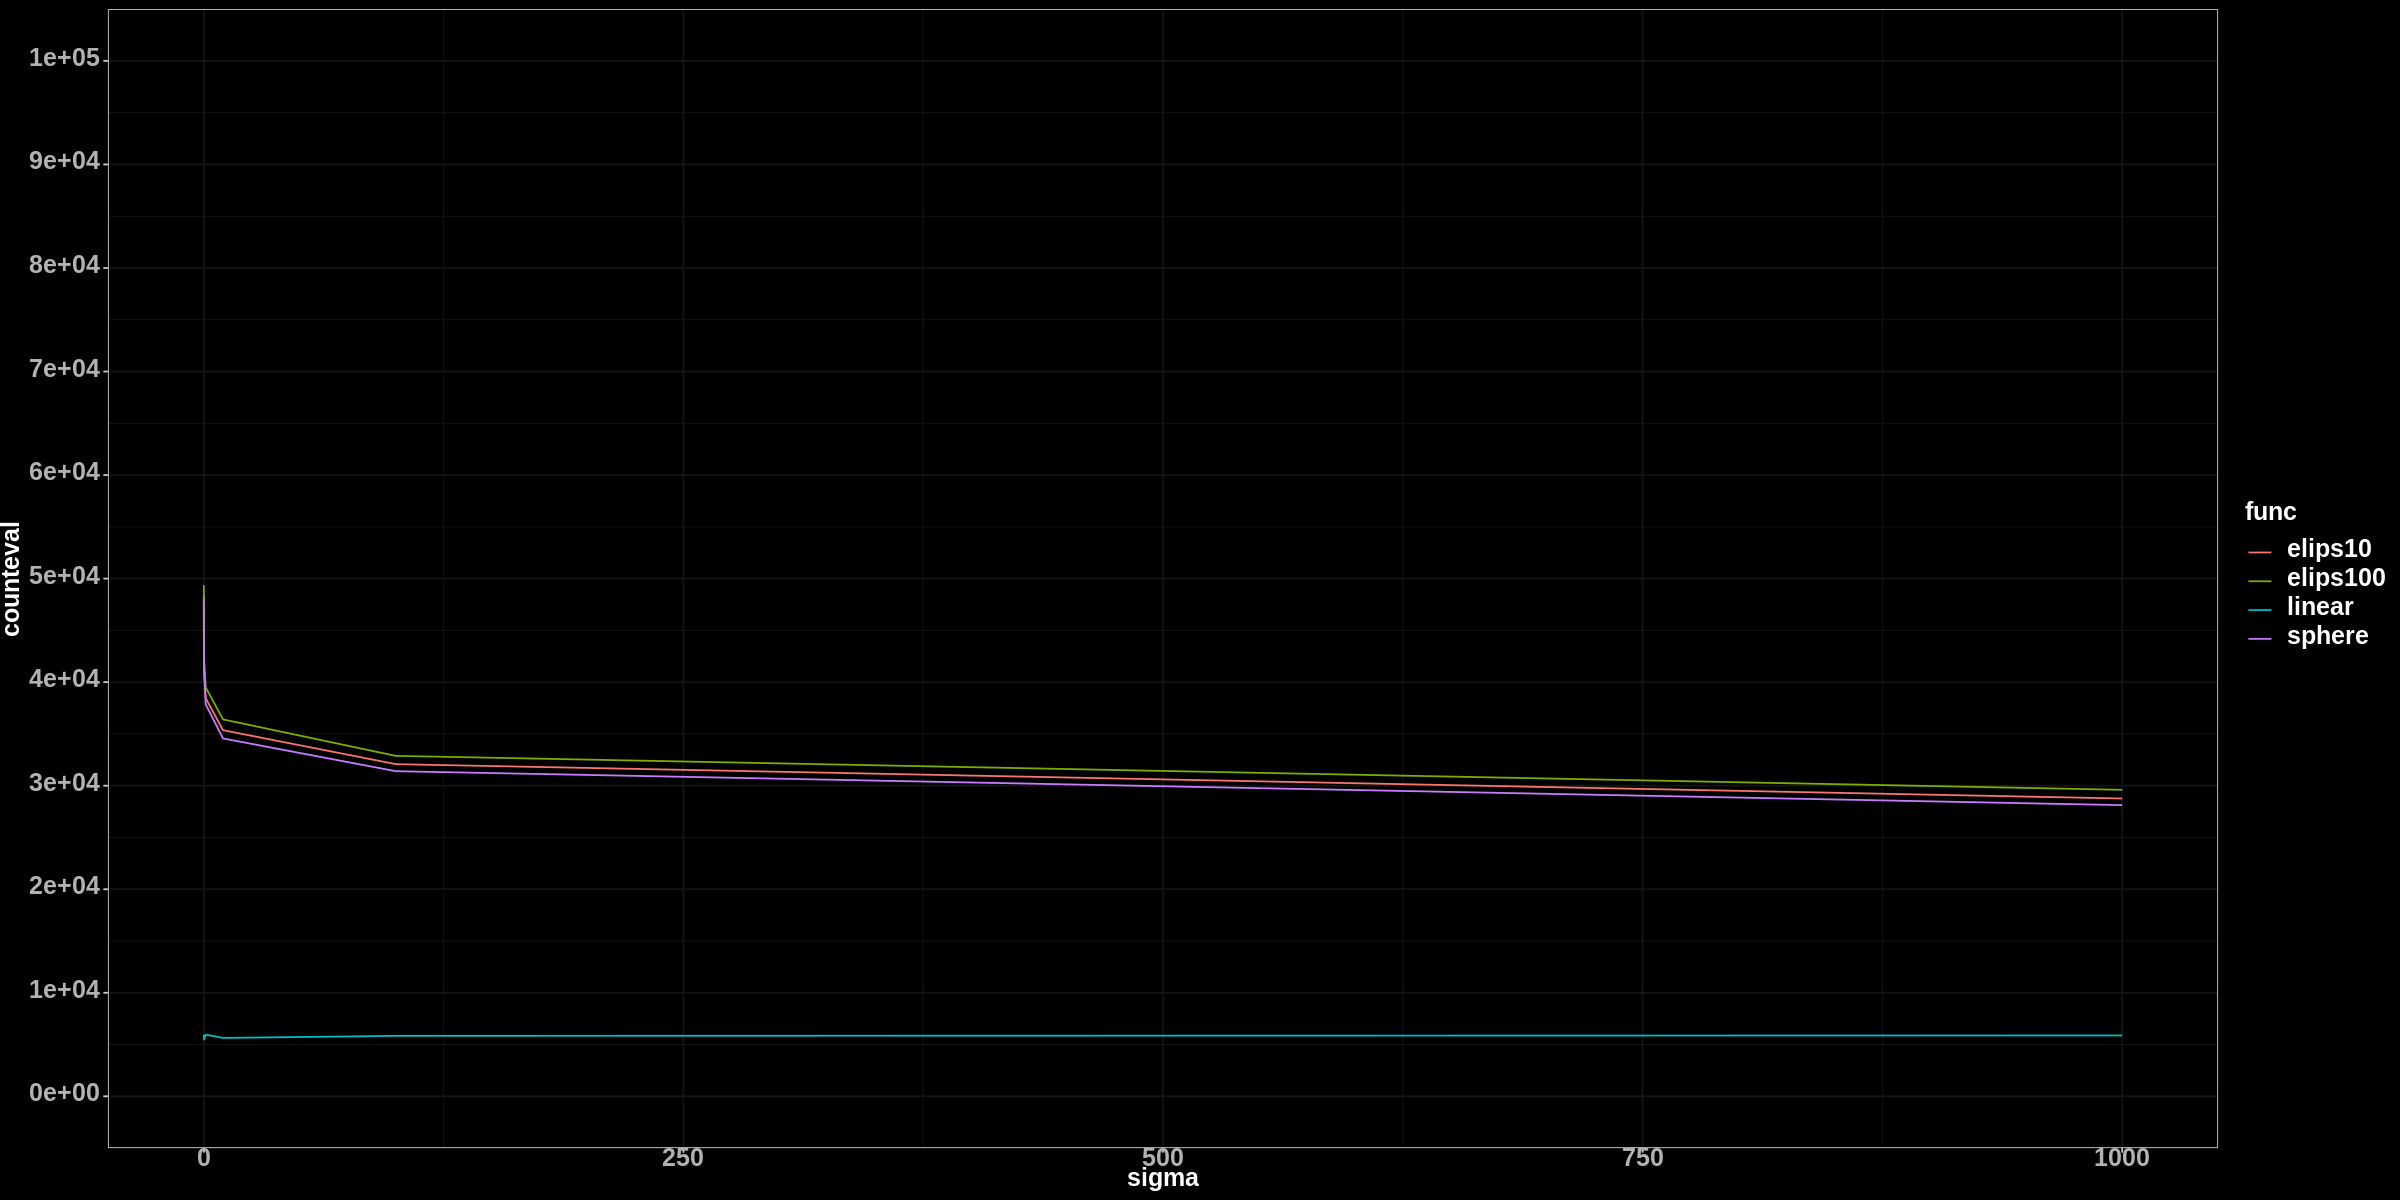

In [22]:
all_data_csa %>% plot_lambda(N = 10)

In [23]:
res_sphere_tpat = 
    run_exp(lambda, cma_es_tpat, sphere_func, x0)
res_linear_tpat = 
    run_exp(lambda, cma_es_tpat, linear_func, x0)
res_elips10_tpat = 
    run_exp(lambda, cma_es_tpat, elips10, x0)
res_elips100_tpat = 
    run_exp(lambda, cma_es_tpat, elips100, x0)

Warning message:
“UNRELIABLE VALUE: Future (‘<none>’) unexpectedly generated random numbers without specifying argument '[future.]seed'. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify argument '[future.]seed', e.g. 'seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use [future].seed=NULL, or set option 'future.rng.onMisuse' to "ignore".”
Warning message:
“UNRELIABLE VALUE: Future (‘<none>’) unexpectedly generated random numbers without specifying argument '[future.]seed'. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify argument '[future.]seed', e.g. 'seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use [future].seed=NULL, or set option 'future.rng.onMisu

In [24]:
res_sphere_tpat %<>% dplyr::mutate(func = "sphere")
res_linear_tpat %<>% dplyr::mutate(func = "linear")
res_elips10_tpat %<>% dplyr::mutate(func = "elips10")
res_elips100_tpat %<>% dplyr::mutate(func = "elips100")

In [25]:
all_data_tpat = 
    dplyr::bind_rows(res_sphere_tpat, res_linear_tpat, res_elips10_tpat, res_elips100_tpat)

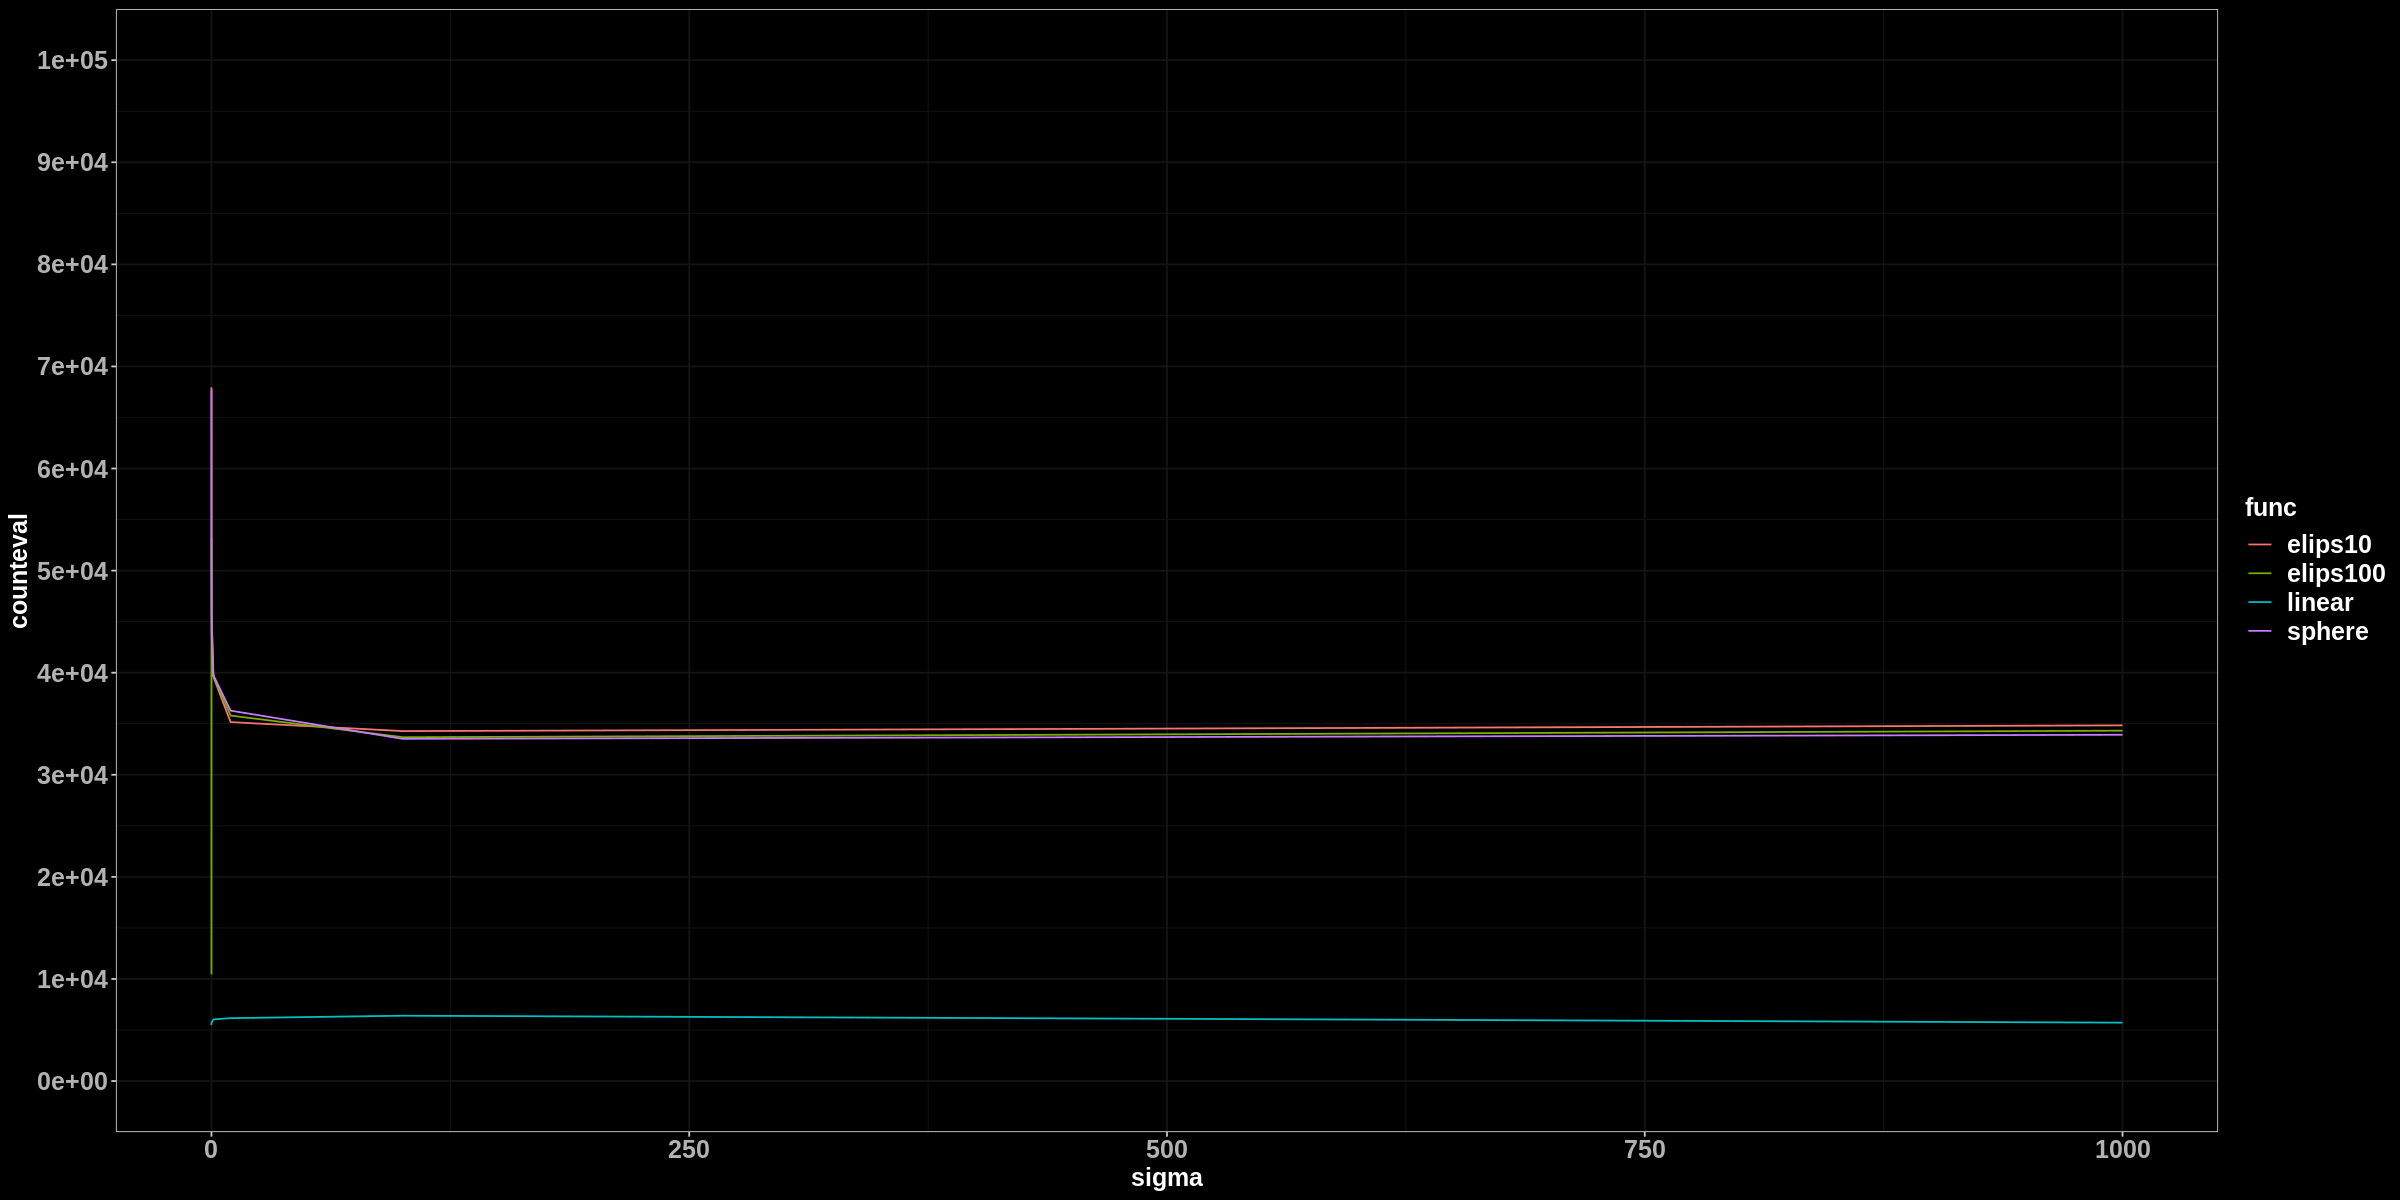

In [26]:
all_data_tpat %>% plot_lambda(N = 10)

In [27]:
all_algs_lambda = 
    dplyr::bind_rows(
        all_data %>% dplyr::mutate(method = "PPMF"),
        all_data_csa %>% dplyr::mutate(method = "CSA"),
        all_data_tpat %>% dplyr::mutate(method = "TPAT")
    )

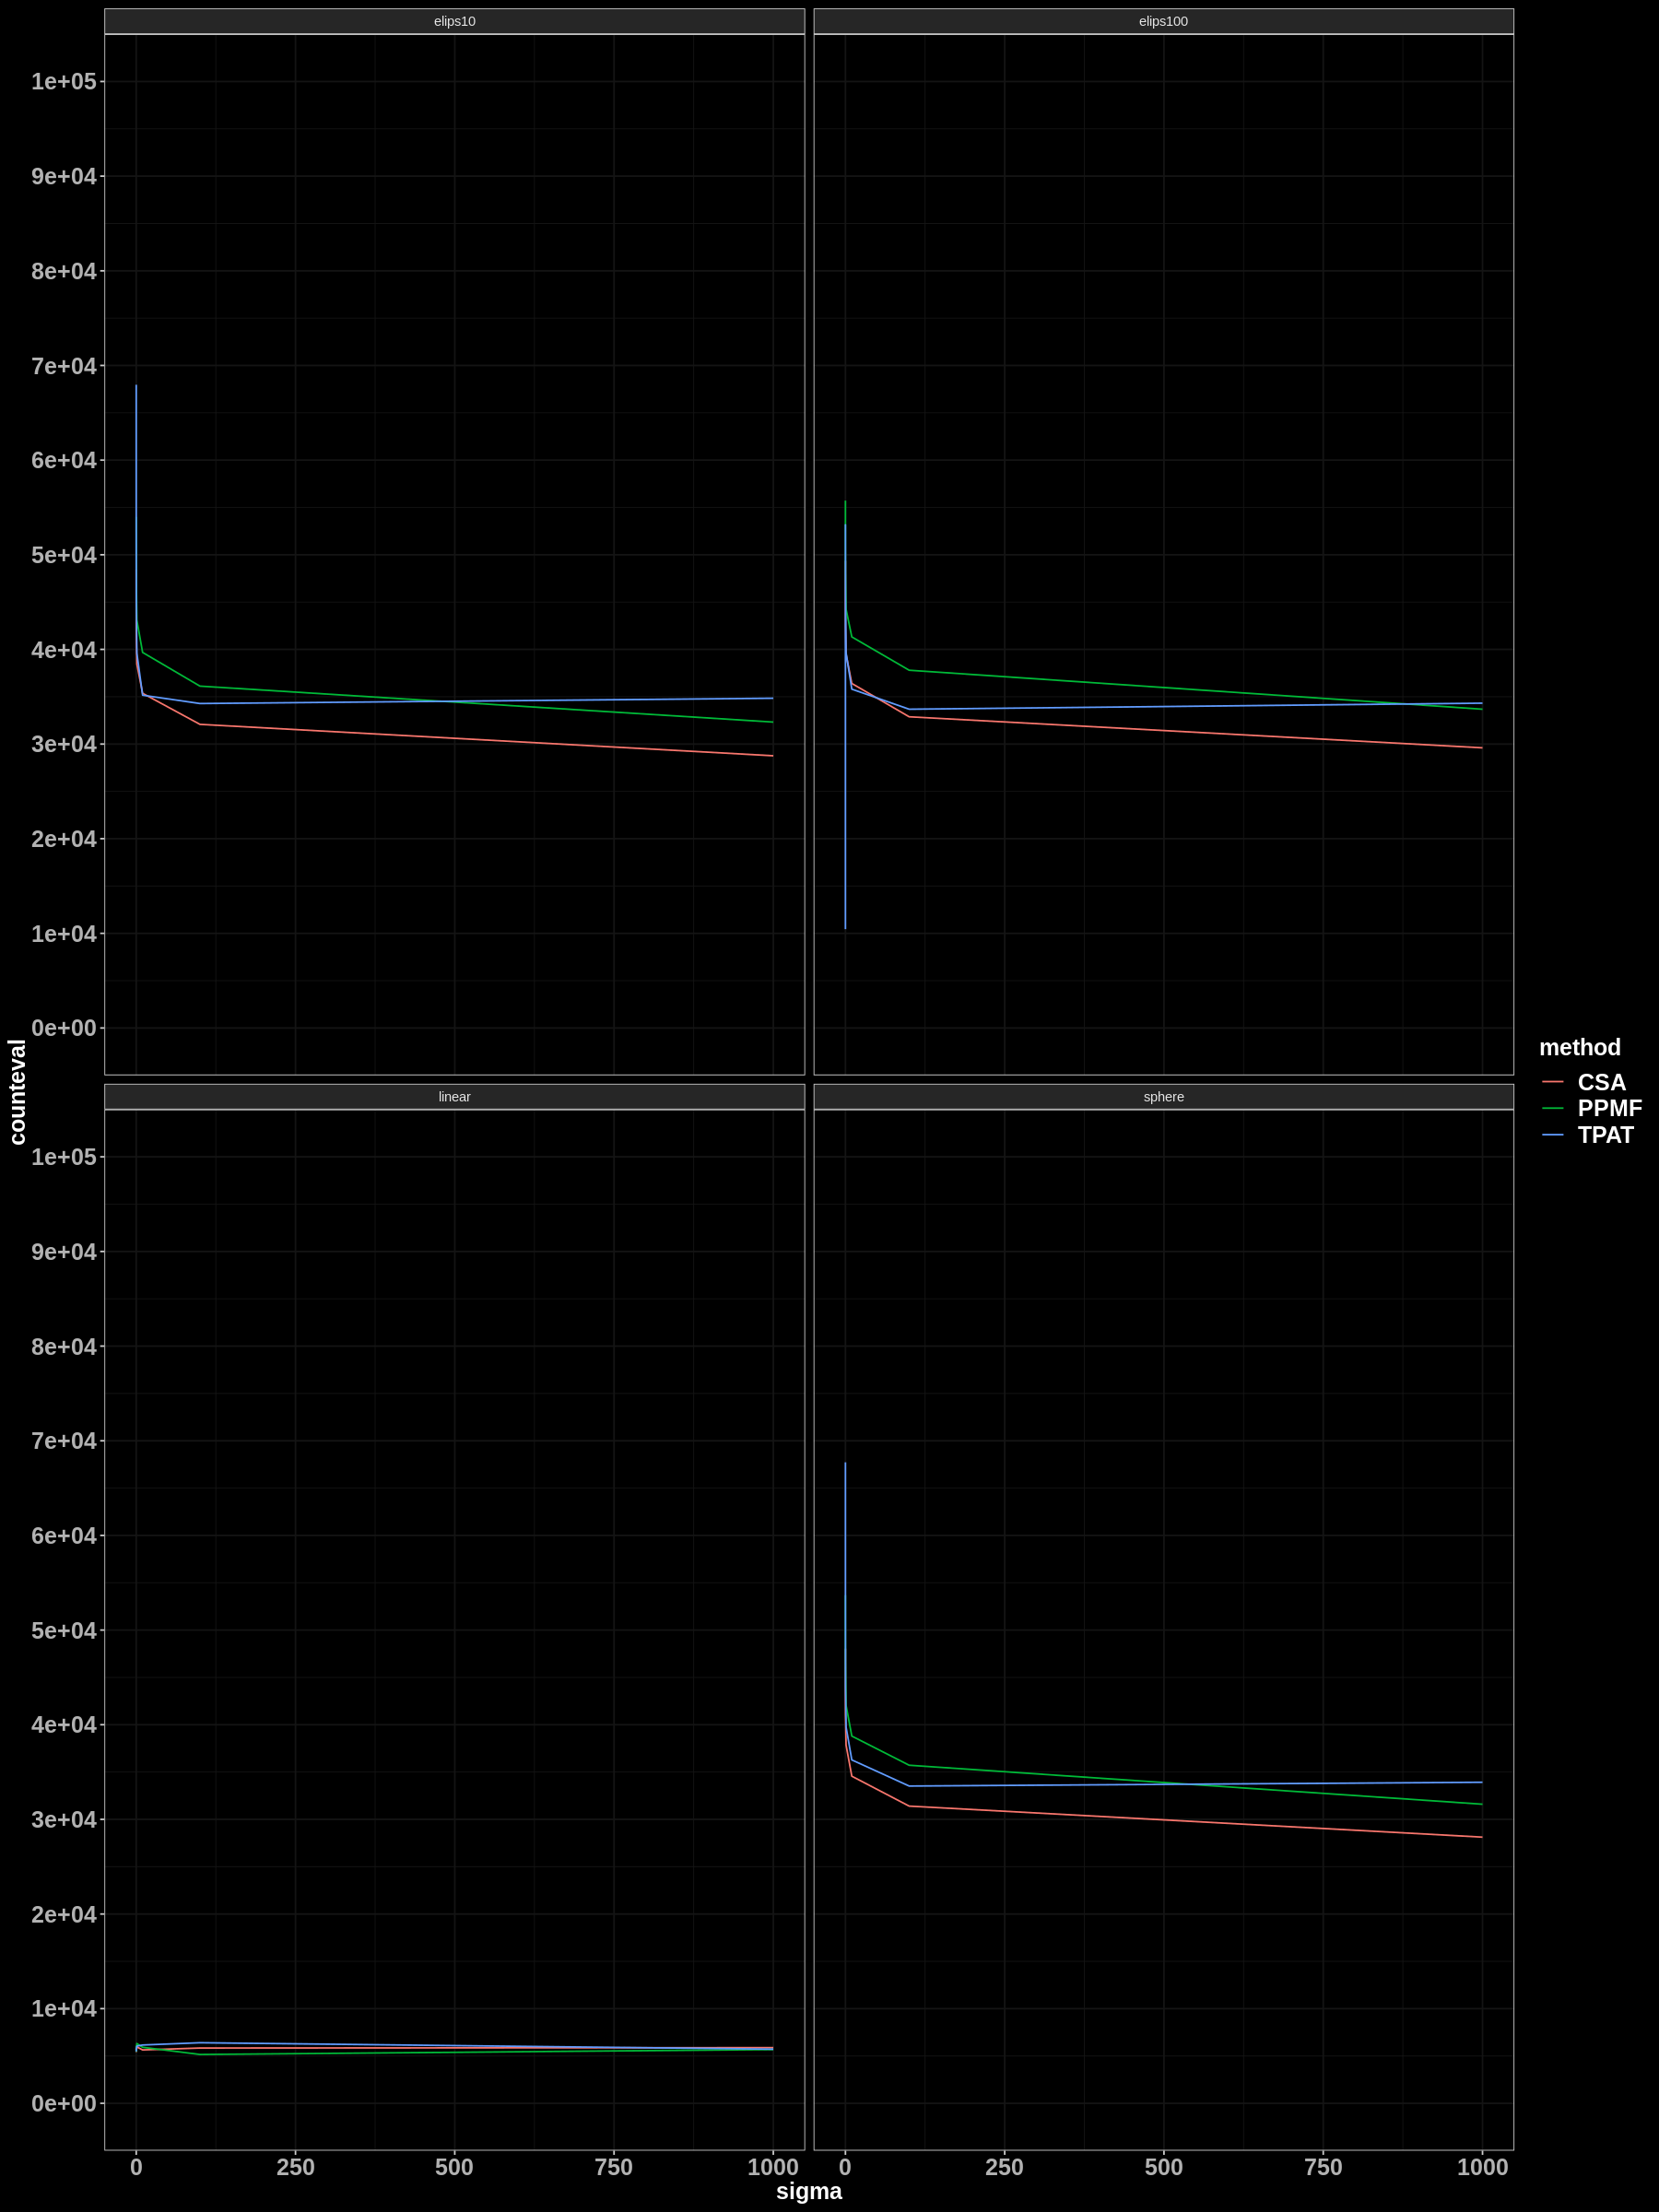

In [32]:
all_algs_lambda %>% plot_lambda_alg(N = 10)
    